In [2]:
from sklearn import datasets, linear_model, ensemble
from sklearn.model_selection import train_test_split
#import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
np.random.seed(1234) # Fijo semilla aleatoria

In [3]:
data = datasets.load_boston()
print(data.DESCR)
#data.target

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [4]:
# Creamos un dataframe con los datos
df = pd.DataFrame(data.data, columns=data.feature_names)
target = pd.DataFrame(data.target, columns=['MEDV'])
x = df
y = target['MEDV']

# Chequeamos las variables:
print(x.shape)
print(y.shape)

(506, 13)
(506,)


In [5]:
# División automatica 0.75 - 0.25
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(379, 13)
(127, 13)
(379,)
(127,)


## Regresión  Linear 

In [6]:
# Regresión  Linear
lm = linear_model.LinearRegression()

In [7]:
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
expected = y_test
rmse = np.sqrt(np.mean((predictions - expected) ** 2))
print("RMSE (Media cuadratica de los errores): %s" % rmse) 

RMSE (Media cuadratica de los errores): 5.231707533862203


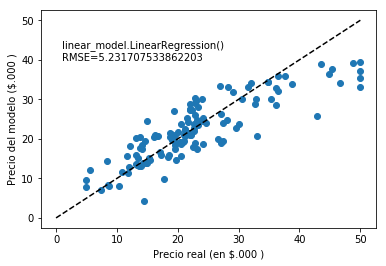

In [8]:
plt.scatter(expected, predictions) 
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('Precio real (en $.000 )')
plt.ylabel('Precio del modelo ($.000 )')
plt.text(1,40, 'linear_model.LinearRegression()\nRMSE=%s' % rmse);

In [9]:
# Parametros de la regresión:
model.coef_, model.intercept_
#model.get_params()

(array([-9.66378735e-02,  6.31080432e-02, -1.38069045e-02,  2.84516261e+00,
        -2.19347661e+01,  2.40835980e+00,  2.45246610e-03, -1.89020994e+00,
         3.56217021e-01, -1.27942145e-02, -1.05991197e+00,  1.02040679e-02,
        -5.63773228e-01]), 50.875966816060455)

## Gradient boosting o Potenciación del gradiente

In [10]:
lm = ensemble.GradientBoostingRegressor()
model = lm.fit(X_train, y_train)

predictions = lm.predict(X_test)
expected = y_test
rmse = np.sqrt(np.mean((predictions - expected) ** 2))
print("RMSE (Media cuadratica de los errores): %s" % rmse) 


RMSE (Media cuadratica de los errores): 2.974490437363974


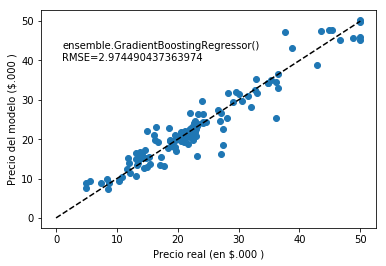

In [11]:
plt.scatter(expected, predictions) 
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('Precio real (en $.000 )')
plt.ylabel('Precio del modelo ($.000 )')
plt.text(1,40, 'ensemble.GradientBoostingRegressor()\nRMSE=%s' % rmse);